Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from datetime import datetime

In [120]:
temp=pd.DataFrame({'t_max':[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                   't_min':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})
temp                  

,t_max,t_min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


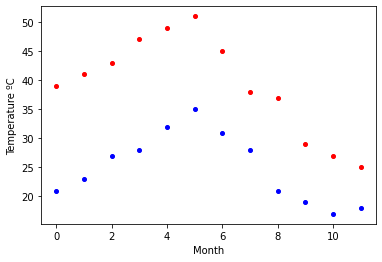

In [135]:
plt.plot(temp['t_max'],color='r',marker='.', linestyle='', markersize=8)
plt.plot(temp['t_min'],color='b',marker='.',linestyle='', markersize=8)
plt.xlabel('Month')
plt.ylabel('Temperature ºC')
plt.show()

In [155]:
# Periodic function where ave -> average, and amp-> amplitud
def test_func(month, ave, amp,offset):
    return (ave+amp*np.cos((month+offset)*2*np.pi/month.max()))

In [166]:
# 1.fitting it to the periodic function
t_max_params, t_max_params_covariance = optimize.curve_fit(test_func,temp.index,temp.t_max,method='lm',
                                               p0=[np.mean(temp['t_max']),(temp['t_max'].max()-temp['t_max'].min()),0])

t_min_params, t_min_params_covariance = optimize.curve_fit(test_func,temp.index,temp.t_min,method='lm',
                                               p0=[np.mean(temp['t_min']),(temp['t_min'].max()-temp['t_min'].min()),0])

print('___Maximun Temperature parameters____', '\n', t_max_params)
print('\n','___Minimun Temperature parameters____', '\n', t_min_params)

___Maximun Temperature parameters____ 
 [ 39.88861733 -10.5908316    1.33370157]

 ___Minimun Temperature parameters____ 
 [25.55626462 -7.74472962  0.93101293]


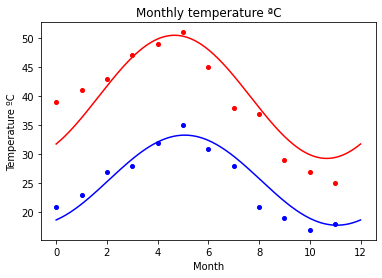

In [180]:
#2.plot the fit
time=np.linspace(0,12, 200)
plt.figure(figsize=(6, 4))

plt.plot(temp['t_max'],color='r',linestyle='',marker='.', markersize=8)
plt.plot(time,test_func(time, *t_max_params), color='r')

plt.plot(temp['t_min'],color='b',linestyle='',marker='.', markersize=8)
plt.plot(time,test_func(time, *t_min_params), color='b')

plt.title('Monthly temperature ªC')
plt.xlabel('Month')
plt.ylabel('Temperature ºC')
plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [181]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [278]:
titanic['sex'].shape

(1310,)

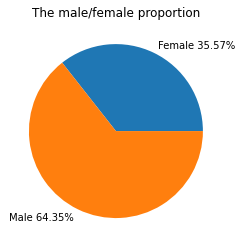

In [206]:
# 1. Create a pie chart presenting the male/female proportion
plt.pie([(titanic['sex']=='female').sum(),(titanic['sex']=='male').sum()], 
        labels=['Female {:.2f}%'.format((titanic['sex']=='female').sum()*100/1310), 'Male {:.2f}%'.format((titanic['sex']=='male').sum()*100/1310)])
plt.title('The male/female proportion')
plt.show()

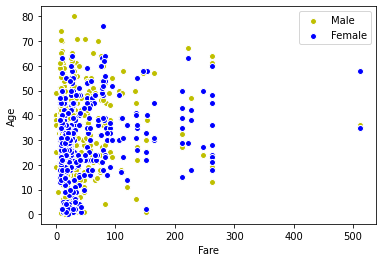

In [303]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

fig, ax = plt.subplots()

male=ax.scatter(titanic.fare[titanic['sex']=='male'], titanic.age[titanic['sex']=='male'],color='y',edgecolors='w', label='Male')
female=ax.scatter(titanic.fare[titanic['sex']=='female'], titanic.age[titanic['sex']=='female'],color='b',edgecolors='w', label='Female')

plt.legend()
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

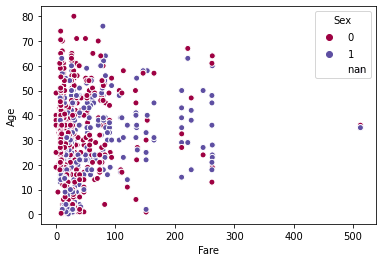

In [310]:
# other way
fig1, ax1 = plt.subplots()

scatter=ax1.scatter(titanic['fare'], titanic['age'],c=((titanic['sex']=='female')*1),cmap='Spectral', edgecolors='w')

ax1.legend(*scatter.legend_elements(),
                    loc="upper right", title="Sex")

plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

In [213]:
import seaborn as sns

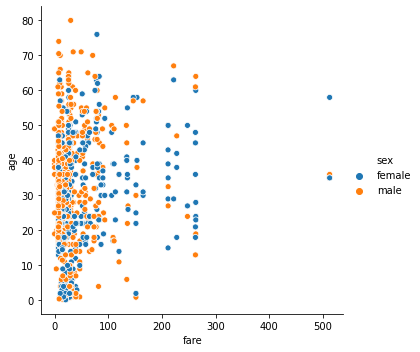

In [241]:
sns.relplot(x = 'fare', y = 'age', hue = 'sex',  data = titanic);